In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('four_dataset.csv')
df.head()

,rainfall_mm,temperature_c,soil_ph,yield_kg
0,802,25.2,7.0,2015
1,1418,23.1,5.6,2777
2,706,28.7,7.2,1472
3,728,25.1,6.2,2117
4,1352,28.1,6.3,2763


In [3]:
x = df[['rainfall_mm', 'temperature_c', 'soil_ph']].values.reshape(-1,3)
y = df['yield_kg'].values.reshape(-1,1)

sc = MinMaxScaler()
x_norm = sc.fit_transform(x)

yn = y.min()
yx = y.max()
y = (y-yn)/(yx-yn)

jb.dump(sc, 'scaler_four.pkl')


['scaler_four.pkl']

In [5]:
def Yield(rain,temp,ph):
    model_path = 'four.keras'
    sc = jb.load('scaler_four.pkl')
    inp = np.array([[rain,temp,ph]])
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else: 
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(3,), activation='relu'),
                                    keras.layers.Dense(16, activation='relu'),
                                    keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y, epochs=500)
        model.save('four.keras')
        pred = model.predict(x_norm)
        lv = hist.history['loss']
        
        plt.figure()
        plt.plot(lv)
        plt.grid(True)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('loss values')
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.title('Actual vs Predicted')
        plt.show()
    return model.predict(np.array(inp))[0][0]*(yx - yn)+yn

c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.2991
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2780
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2494
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2333
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2064
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1841
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1640
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1557
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1263
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1152
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1003
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0872
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0764
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0669
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0588
Epoch 16/500
2/2 ━━

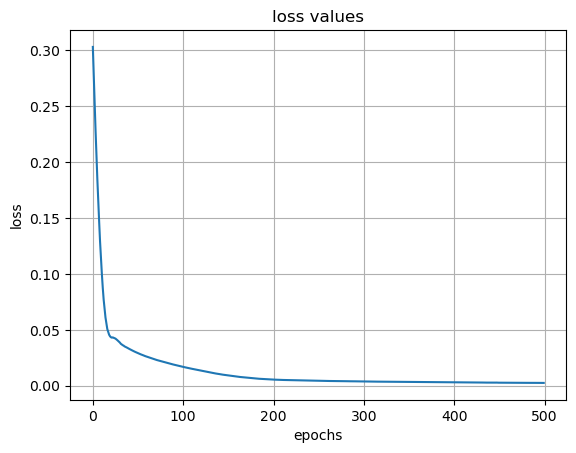

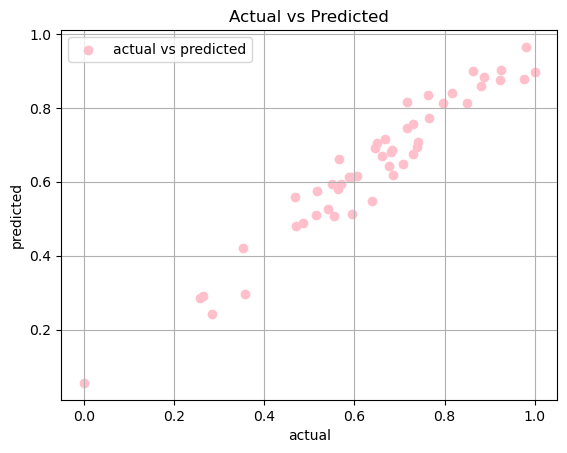

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1818.7480796575546
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
943.1535634994507
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
2087.260504722595


In [6]:
print(Yield(800, 28, 6.5))   # Expected: ~2500 kg
print(Yield(600, 30, 5.8))   # Expected: ~2000 kg
print(Yield(1000, 27, 6.8))  # Expected: ~2700 kg
